In [212]:
# import libraries
import json
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)
sns.set(style="white", color_codes=True)

import Functions_EDA as Functions_EDA

import plotly.figure_factory as ff
import plotly.express as px  
import warnings
warnings.filterwarnings('ignore')

Import datasets and clean:

In [213]:
# upload obesity data
df = pd.read_csv('/Users/lizzieriordan/Desktop/health/share-of-adults-defined-as-obese/share-of-adults-defined-as-obese.csv')
df.head()


,Entity,Code,Year,"Prevalence of obesity among adults, BMI >= 30 (crude estimate) (%) - Sex: both sexes - Age group: 18+ years"
0,Afghanistan,AFG,1975,0.4
1,Afghanistan,AFG,1976,0.4
2,Afghanistan,AFG,1977,0.5
3,Afghanistan,AFG,1978,0.5
4,Afghanistan,AFG,1979,0.5


In [214]:
print(df.columns)

# Change column names
df.rename(columns={'Prevalence of obesity among adults, BMI >= 30 (crude estimate) (%) - Sex: both sexes - Age group: 18+  years':
                   'obesity_rates', 'Entity':'Country'}, inplace=True)


# Filter rows where the year is 2016
df_2016 = df[df['Year'] == 2016].reset_index()
df_2016.drop('index', axis=1, inplace=True)
df_2016.head()


Index(['Entity', 'Code', 'Year',
       'Prevalence of obesity among adults, BMI >= 30 (crude estimate) (%) - Sex: both sexes - Age group: 18+  years'],
      dtype='object')


,Country,Code,Year,obesity_rates
0,Afghanistan,AFG,2016,4.5
1,Africa (WHO),NaN,2016,9.1
2,Albania,ALB,2016,22.3
3,Algeria,DZA,2016,26.6
4,Americas (WHO),NaN,2016,29.0


In [215]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        197 non-null    object 
 1   Code           190 non-null    object 
 2   Year           197 non-null    int64  
 3   obesity_rates  197 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.3+ KB


In [216]:
# Filter NaN
nan_rows = df_2016[df_2016['Code'].isna()]

print(nan_rows)

                         Country Code  Year  obesity_rates
1                   Africa (WHO)  NaN  2016            9.1
4                 Americas (WHO)  NaN  2016           29.0
54   Eastern Mediterranean (WHO)  NaN  2016           19.5
63                  Europe (WHO)  NaN  2016           25.3
165        South-East Asia (WHO)  NaN  2016            4.6
168               Sudan (former)  NaN  2016            7.4
193        Western Pacific (WHO)  NaN  2016            6.7


In [217]:
# Drop rows with NaN as they are regional data
df_2016.dropna(inplace=True)
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, 0 to 196
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        190 non-null    object 
 1   Code           190 non-null    object 
 2   Year           190 non-null    int64  
 3   obesity_rates  190 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.4+ KB


In [218]:
df_2016.head()

,Country,Code,Year,obesity_rates
0,Afghanistan,AFG,2016,4.5
2,Albania,ALB,2016,22.3
3,Algeria,DZA,2016,26.6
5,Andorra,AND,2016,28.0
6,Angola,AGO,2016,6.8


In [219]:
# create copy of data
obesity_rates_2016 = df_2016.copy()

In [220]:
# upload vehicle data
data = pd.read_csv('/Users/lizzieriordan/Desktop/health/registered-vehicles-per-1000-people/registered-vehicles-per-1000-people.csv')
data.head()

,Entity,Code,Year,"Registered vehicles per 1,000 people"
0,Afghanistan,AFG,2013,20.724253
1,Albania,ALB,2016,194.317340
2,Antigua and Barbuda,ATG,2016,400.417880
3,Argentina,ARG,2016,492.788900
4,Australia,AUS,2016,753.237370


In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Entity                                161 non-null    object 
 1   Code                                  161 non-null    object 
 2   Year                                  161 non-null    int64  
 3   Registered vehicles per 1,000 people  161 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.2+ KB


In [222]:
data.rename(columns={'Entity':'Country'}, inplace=True)

In [223]:
data['Year'].value_counts()

Year
2016    112
2015     27
2017     12
2014      4
2013      3
2012      2
2007      1
Name: count, dtype: int64

In [224]:
filtered_data = data[data['Year'] == 2007]
filtered_data

,Country,Code,Year,"Registered vehicles per 1,000 people"
11,Belize,BLZ,2007,189.43188


In [225]:
# delete row from 2007 since it's out of scope
data_cleaned = data.drop(data[data['Year'].isin([2007])].index)
data_cleaned['Year'].value_counts()

Year
2016    112
2015     27
2017     12
2014      4
2013      3
2012      2
Name: count, dtype: int64

In [226]:
#create copy of data
vehicle_data = data_cleaned.copy()

In [227]:
# import caloric intake data
cal_df = pd.read_csv('/Users/lizzieriordan/Desktop/health/dietary-compositions-by-commodity-group (1)/dietary-compositions-by-commodity-group.csv')
cal_df.head()

,Entity,Code,Year,Daily calorie supply per person from other commodities,Daily calorie supply per person from alcoholic beverages,Daily calorie supply per person from sugar,Daily calorie supply per person from oils and fats,Daily calorie supply per person from meat,Daily calorie supply per person from dairy and eggs,Daily calorie supply per person from fruits and vegetables,Daily calorie supply per person from starchy roots,Daily calorie supply per person from pulses,Daily calorie supply per person from cereals and grains
0,Afghanistan,AFG,1961,12.223696,0.0,51.950710,93.715004,90.65908,103.901410,83.52859,25.466034,16.298262,2576.1440
1,Afghanistan,AFG,1962,13.250671,0.0,45.867710,99.889680,90.71613,102.947525,77.46546,22.424213,17.327800,2505.3962
2,Afghanistan,AFG,1963,13.259131,0.0,47.936860,108.112915,92.81392,112.192650,80.57472,23.458462,17.338863,2257.1120
3,Afghanistan,AFG,1964,14.286554,0.0,56.125748,104.087750,94.90354,112.251495,96.94447,24.491236,18.368427,2494.0242
4,Afghanistan,AFG,1965,14.292503,0.0,58.190907,107.193770,96.98485,120.465385,96.98485,24.501434,18.376076,2481.7913


In [239]:
# Filter rows where year is 2016
calories = cal_df[cal_df['Year'] == 2016].reset_index()
calories.drop('index', axis=1, inplace=True)
calories.head()

,Entity,Code,Year,Daily calorie supply per person from other commodities,Daily calorie supply per person from alcoholic beverages,Daily calorie supply per person from sugar,Daily calorie supply per person from oils and fats,Daily calorie supply per person from meat,Daily calorie supply per person from dairy and eggs,Daily calorie supply per person from fruits and vegetables,Daily calorie supply per person from starchy roots,Daily calorie supply per person from pulses,Daily calorie supply per person from cereals and grains
0,Afghanistan,AFG,2016,11.000000,1.000000,113.00000,220.00000,53.00000,108.000000,108.00000,27.000000,25.00000,1581.0000
1,Africa,NaN,2016,21.903353,30.887436,161.78236,308.31763,101.46884,72.496605,154.94066,405.227140,96.61604,1212.8325
2,Africa (FAO),NaN,2016,22.000000,31.000000,159.00000,308.00000,102.00000,73.000000,155.00000,405.000000,97.00000,1213.0000
3,Albania,ALB,2016,45.999940,58.999920,195.99973,403.99945,234.99968,718.999000,498.99933,81.999886,45.99994,1079.9985
4,Algeria,DZA,2016,39.000000,7.000000,291.00000,632.00000,112.00000,312.000000,392.00000,120.000000,63.00000,1488.0000


In [240]:
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 13 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Entity                                                      222 non-null    object 
 1   Code                                                        180 non-null    object 
 2   Year                                                        222 non-null    int64  
 3   Daily calorie supply per person from other commodities      222 non-null    float64
 4   Daily calorie supply per person from alcoholic beverages    220 non-null    float64
 5   Daily calorie supply per person from sugar                  222 non-null    float64
 6   Daily calorie supply per person from oils and fats          222 non-null    float64
 7   Daily calorie supply per person from meat                   222 non-null    float64
 8   

In [241]:
# Drop na within code column
calories.dropna(subset=['Code'], inplace=True)
calories.isna().sum()

Entity                                                        0
Code                                                          0
Year                                                          0
Daily calorie supply per person from other commodities        0
Daily calorie supply per person from alcoholic beverages      2
Daily calorie supply per person from sugar                    0
Daily calorie supply per person from oils and fats            0
Daily calorie supply per person from meat                     0
Daily calorie supply per person from dairy and eggs           0
Daily calorie supply per person from fruits and vegetables    0
Daily calorie supply per person from starchy roots            0
Daily calorie supply per person from pulses                   0
Daily calorie supply per person from cereals and grains       0
dtype: int64

In [242]:
calories.columns

Index(['Entity', 'Code', 'Year',
       'Daily calorie supply per person from other commodities',
       'Daily calorie supply per person from alcoholic beverages',
       'Daily calorie supply per person from sugar',
       'Daily calorie supply per person from oils and fats',
       'Daily calorie supply per person from meat',
       'Daily calorie supply per person from dairy and eggs',
       'Daily calorie supply per person from fruits and vegetables',
       'Daily calorie supply per person from starchy roots',
       'Daily calorie supply per person from pulses',
       'Daily calorie supply per person from cereals and grains'],
      dtype='object')

In [243]:
# Rename columns
calories.rename(columns={'Entity':'Country', 
                         'Daily calorie supply per person from other commodities':'other_commodities',
                         'Daily calorie supply per person from alcoholic beverages':'alcoholic_beverages',
                         'Daily calorie supply per person from sugar':'sugar',
                         'Daily calorie supply per person from oils and fats':'oils_fats',
                         'Daily calorie supply per person from meat':'meat',
                         'Daily calorie supply per person from dairy and eggs':'dairy_eggs',
                         'Daily calorie supply per person from fruits and vegetables':'fruits_vegetables',
                         'Daily calorie supply per person from starchy roots':'starchy_roots',
                         'Daily calorie supply per person from pulses':'pulses',
                         'Daily calorie supply per person from cereals and grains':'cereals_grains'
                         }, inplace=True)
calories.head()

,Country,Code,Year,other_commodities,alcoholic_beverages,sugar,oils_fats,meat,dairy_eggs,fruits_vegetables,starchy_roots,pulses,cereals_grains
0,Afghanistan,AFG,2016,11.000000,1.00000,113.00000,220.00000,53.00000,108.000000,108.00000,27.000000,25.000000,1581.00000
3,Albania,ALB,2016,45.999940,58.99992,195.99973,403.99945,234.99968,718.999000,498.99933,81.999886,45.999940,1079.99850
4,Algeria,DZA,2016,39.000000,7.00000,291.00000,632.00000,112.00000,312.000000,392.00000,120.000000,63.000000,1488.00000
6,Angola,AGO,2016,13.000004,81.00002,126.00004,353.00010,147.00005,23.000006,138.00003,757.000200,66.000015,726.00020
7,Antigua and Barbuda,ATG,2016,77.987076,123.97946,259.95694,424.92963,373.93805,185.969200,252.95810,44.992546,14.997516,635.89465


In [244]:
# Round numerical values to 2 decimal places
calories = calories.round(2)
calories.head()

,Country,Code,Year,other_commodities,alcoholic_beverages,sugar,oils_fats,meat,dairy_eggs,fruits_vegetables,starchy_roots,pulses,cereals_grains
0,Afghanistan,AFG,2016,11.00,1.00,113.00,220.00,53.00,108.00,108.00,27.00,25.0,1581.00
3,Albania,ALB,2016,46.00,59.00,196.00,404.00,235.00,719.00,499.00,82.00,46.0,1080.00
4,Algeria,DZA,2016,39.00,7.00,291.00,632.00,112.00,312.00,392.00,120.00,63.0,1488.00
6,Angola,AGO,2016,13.00,81.00,126.00,353.00,147.00,23.00,138.00,757.00,66.0,726.00
7,Antigua and Barbuda,ATG,2016,77.99,123.98,259.96,424.93,373.94,185.97,252.96,44.99,15.0,635.89


In [245]:
calories['total_avg_calories'] = calories.iloc[:, 3:].sum(axis=1)
calories.head()

,Country,Code,Year,other_commodities,alcoholic_beverages,sugar,oils_fats,meat,dairy_eggs,fruits_vegetables,starchy_roots,pulses,cereals_grains,total_avg_calories
0,Afghanistan,AFG,2016,11.00,1.00,113.00,220.00,53.00,108.00,108.00,27.00,25.0,1581.00,2247.00
3,Albania,ALB,2016,46.00,59.00,196.00,404.00,235.00,719.00,499.00,82.00,46.0,1080.00,3366.00
4,Algeria,DZA,2016,39.00,7.00,291.00,632.00,112.00,312.00,392.00,120.00,63.0,1488.00,3456.00
6,Angola,AGO,2016,13.00,81.00,126.00,353.00,147.00,23.00,138.00,757.00,66.0,726.00,2430.00
7,Antigua and Barbuda,ATG,2016,77.99,123.98,259.96,424.93,373.94,185.97,252.96,44.99,15.0,635.89,2395.61


In [246]:
# Create copy of data
caloric_intake = calories.copy()

In [185]:
# import HDI data
hdi = pd.read_csv('/Users/lizzieriordan/Desktop/health/human-development-index.filtered/human-development-index.csv')
hdi.head()

,Entity,Code,Year,Human Development Index
0,Afghanistan,AFG,1990,0.284
1,Afghanistan,AFG,1991,0.292
2,Afghanistan,AFG,1992,0.299
3,Afghanistan,AFG,1993,0.307
4,Afghanistan,AFG,1994,0.300


In [186]:
# Filter rows where year is 2016
hdi_2016 = hdi[hdi['Year'] == 2016].reset_index()
hdi_2016.drop('index', axis=1, inplace=True)
hdi_2016.head()

,Entity,Code,Year,Human Development Index
0,Afghanistan,AFG,2016,0.483000
1,Africa,NaN,2016,0.539463
2,Albania,ALB,2016,0.795000
3,Algeria,DZA,2016,0.738000
4,Andorra,AND,2016,0.859000


In [187]:
# Drop na within code column
hdi_2016.dropna(subset=['Code'], inplace=True)
hdi_2016.isna().sum()

Entity                     0
Code                       0
Year                       0
Human Development Index    0
dtype: int64

In [188]:
# Change column names and round decimal places
hdi_2016.rename(columns={'Entity':'Country', 'Human Development Index':'HDI'}, inplace=True)
hdi_2016 = hdi_2016.round(2)
hdi_2016.head()

,Country,Code,Year,HDI
0,Afghanistan,AFG,2016,0.48
2,Albania,ALB,2016,0.80
3,Algeria,DZA,2016,0.74
4,Andorra,AND,2016,0.86
5,Angola,AGO,2016,0.60


In [189]:
# Create copy of data
hdi_data = hdi_2016.copy()

Visualization of datasets:

- obesity_rates_2016

- vehicle_data

- caloric_intake

- hdi_2016


In [190]:
obesity_rates_2016.head()

,Country,Code,Year,obesity_rates
0,Afghanistan,AFG,2016,4.5
2,Albania,ALB,2016,22.3
3,Algeria,DZA,2016,26.6
5,Andorra,AND,2016,28.0
6,Angola,AGO,2016,6.8


In [191]:
# Create choropleth map for obesity rates
fig = px.choropleth(obesity_rates_2016, #dataset 
                    locations="Country", #column in dataset
                    locationmode="country names", #type of location
                    color="obesity_rates", #column in dataset
                    color_continuous_scale="gnbu", #color scale
                    labels={"obesity_rates": "Obesity Rates (%)"}, #label for color bar
                    title="Prevalence of Obesity Among Adults") #title of plot


# Add annotation
fig.add_annotation(
    text="Percentage estimate of all sexes and ages 18+", #text
    x=0, #x position
    y=0.15, #y position                   
    showarrow=False, #remove arrow             
    font=dict(size=12, color="black") #font size and color
)

# Show map
fig.update_layout(
    width=1100,  
    height=900,
    title={
        'x': 0.5, #x position
        'y': 0.77, #y position
        'xanchor': 'center',
        'yanchor': 'bottom', 
      
    },
    title_font=dict(
        family="Georgia",
        size=25, 
        color="black",
    ),
    # customize legend
    coloraxis_colorbar=dict( 
        title_font=dict(color='black')  # Change title color to black
    )
)

fig.show()

In [195]:
# merge vehicle data and obesity rates
merged_data = pd.merge(obesity_rates_2016, vehicle_data, on=['Country', 'Code', 'Year'], how='inner')
merged_data.head()

,Country,Code,Year,obesity_rates,"Registered vehicles per 1,000 people"
0,Albania,ALB,2016,22.3,194.31734
1,Antigua and Barbuda,ATG,2016,19.1,400.41788
2,Argentina,ARG,2016,28.5,492.78890
3,Australia,AUS,2016,30.4,753.23737
4,Austria,AUT,2016,21.9,849.36084


Text(0, 0.5, 'Registered Vehicles per 1,000 People')

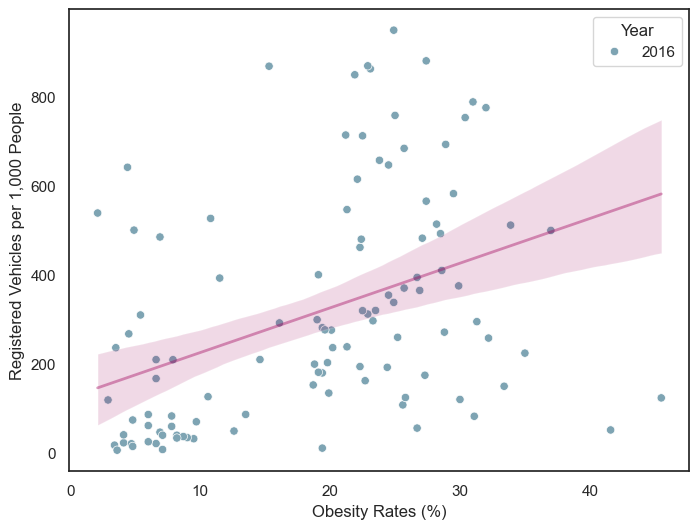

In [206]:
# create scatterplot of merged dataframe
fig, ax = plt.subplots(figsize=(8, 6))
scatter = sns.scatterplot(data=merged_data, x="obesity_rates", y="Registered vehicles per 1,000 people", hue='Year', palette = ['#7ea4b3', '#FFAA33'])
scatter.legend(title='Year')


sns.regplot(data = merged_data, x='obesity_rates', y='Registered vehicles per 1,000 people', scatter=False, color='#ffd2d1', line_kws={'color':'#a0025c', 'linewidth': 2, 'alpha':0.4},)
plt.xlabel('Obesity Rates (%)')
plt.ylabel('Registered Vehicles per 1,000 People')

Loose coorelation between obesity rates and vehicles.

In [247]:
# merge caloric intake and obesity rates to see correlation caloric intake and obesity rates
merge_calories = pd.merge(caloric_intake, obesity_rates_2016, on=['Country', 'Code', 'Year'], how='inner')
merge_calories.head()

,Country,Code,Year,other_commodities,alcoholic_beverages,sugar,oils_fats,meat,dairy_eggs,fruits_vegetables,starchy_roots,pulses,cereals_grains,total_avg_calories,obesity_rates
0,Afghanistan,AFG,2016,11.00,1.00,113.00,220.00,53.00,108.00,108.00,27.00,25.0,1581.00,2247.00,4.5
1,Albania,ALB,2016,46.00,59.00,196.00,404.00,235.00,719.00,499.00,82.00,46.0,1080.00,3366.00,22.3
2,Algeria,DZA,2016,39.00,7.00,291.00,632.00,112.00,312.00,392.00,120.00,63.0,1488.00,3456.00,26.6
3,Angola,AGO,2016,13.00,81.00,126.00,353.00,147.00,23.00,138.00,757.00,66.0,726.00,2430.00,6.8
4,Antigua and Barbuda,ATG,2016,77.99,123.98,259.96,424.93,373.94,185.97,252.96,44.99,15.0,635.89,2395.61,19.1


In [248]:
# create heatmap of caloric merged datafram
data_corr = merge_calories[['obesity_rates', 'total_avg_calories']].corr()
data_corr

,obesity_rates,total_avg_calories
obesity_rates,1.00000,0.63372
total_avg_calories,0.63372,1.00000


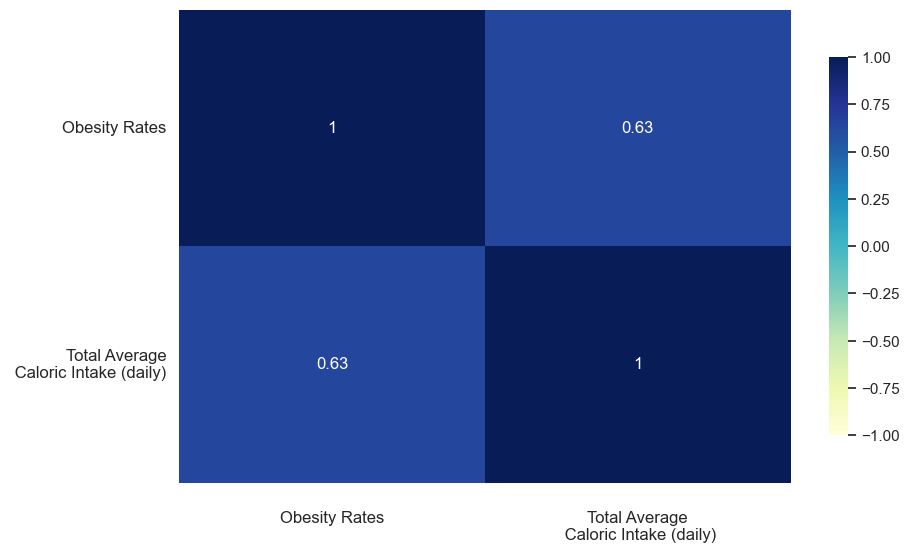

In [250]:
labels = ["Obesity Rates", "Total Average\n Caloric Intake (daily)"]
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(data_corr,vmax=1, vmin=-1,annot = True,
            center=0,yticklabels=labels, xticklabels=labels, cmap = 'YlGnBu', ax=ax, cbar_kws={'shrink': 0.8})

plt.yticks(rotation=0, fontsize=12)
plt.xticks(rotation=0, ha="center", fontsize=12)

ax.tick_params(which='both', length=6, width=1.5, color='black', direction='in', axis='x', pad=20)
plt.tight_layout(pad=2.0)

Strong correlation between obesity rates and average daily caloric intake which should be further investigated. 

In [254]:
# sort merged dataframe highest to lowest
merge_calories.sort_values(by='total_avg_calories', ascending=False, inplace=True)
merge_calories.head()


,Country,Code,Year,other_commodities,alcoholic_beverages,sugar,oils_fats,meat,dairy_eggs,fruits_vegetables,starchy_roots,pulses,cereals_grains,total_avg_calories,obesity_rates
75,Ireland,IRL,2016,90.0,215.0,508.0,651.0,416.0,443.0,223.0,138.0,23.0,1109.0,3816.0,26.9
14,Belgium,BEL,2016,29.0,149.0,513.0,1038.0,299.0,473.0,248.0,157.0,20.0,854.0,3780.0,24.5
164,United States,USA,2016,31.0,168.0,611.0,912.0,469.0,456.0,210.0,102.0,32.0,783.0,3774.0,37.3
8,Austria,AUT,2016,56.0,199.0,492.0,1012.0,394.0,365.0,196.0,103.0,7.0,892.0,3716.0,21.9
158,Turkey,TUR,2016,29.0,23.0,314.0,745.0,179.0,350.0,329.0,83.0,110.0,1519.0,3681.0,32.2


the top 5 countries with the total avg. calories are different than the top 5 countries with the highest obesity rates. Look at the countries with the highest total avg. calories and see why they do not have high obesity rates. 